<a href="https://colab.research.google.com/github/marlEvalDissertation/marlEvalDiss/blob/main/Sample_Efficiency_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Efficiency Curves
## Roland Dubb
## February 2024

This notebook plot the sample efficiency curves of the algorithm runs for the experiments contained in my dissertation, titled:

**Addressing Deep Reinforcement Learning Empirical Algorithm Performance Evaluations**

The code reads in the algorithm performance data of three RL algorithms: DQN, A2C and PPO. These are run on three RL tasks: CartPole, LunarLander and Acrobot. The performance data can be found in our dissertations repository, [here](https://github.com/marlEvalDissertation/marlEvalDiss/tree/main/RL_data). It is contained in .txt files which contain the std output of the algorithm runs. The runs were done using RL Baselines3 Zoo (cited below).

A. Raffin, “Rl baselines3 zoo,” https://github.com/DLR-RM/rl-baselines3-zoo, 2020.

The plots can be found in section 4.2. of the dissertation.

### Download RL Algorithm Performance Data

The performance data can be found in our dissertations repository, [here](https://github.com/marlEvalDissertation/marlEvalDiss/tree/main/RL_data).

### Read Data and Write to CSVs

The performance data is in the format of standard output from our runs so we make CSVs in a neater format

In [29]:
envs = c("acro","ll","cart")
algs = c("a2c","dqn","ppo")

In [30]:
# Load necessary library
library(stringr)

fileNames = c()

for(i in envs)
for(j in algs)
for(runs in 1:5)
{
{
{
  fileNames = c(fileNames,paste(i,"_",j,runs,".txt",sep=""))
}
}
}

In [31]:
print(fileNames)

 [1] "acro_a2c1.txt" "acro_a2c2.txt" "acro_a2c3.txt" "acro_a2c4.txt"
 [5] "acro_a2c5.txt" "acro_dqn1.txt" "acro_dqn2.txt" "acro_dqn3.txt"
 [9] "acro_dqn4.txt" "acro_dqn5.txt" "acro_ppo1.txt" "acro_ppo2.txt"
[13] "acro_ppo3.txt" "acro_ppo4.txt" "acro_ppo5.txt" "ll_a2c1.txt"  
[17] "ll_a2c2.txt"   "ll_a2c3.txt"   "ll_a2c4.txt"   "ll_a2c5.txt"  
[21] "ll_dqn1.txt"   "ll_dqn2.txt"   "ll_dqn3.txt"   "ll_dqn4.txt"  
[25] "ll_dqn5.txt"   "ll_ppo1.txt"   "ll_ppo2.txt"   "ll_ppo3.txt"  
[29] "ll_ppo4.txt"   "ll_ppo5.txt"   "cart_a2c1.txt" "cart_a2c2.txt"
[33] "cart_a2c3.txt" "cart_a2c4.txt" "cart_a2c5.txt" "cart_dqn1.txt"
[37] "cart_dqn2.txt" "cart_dqn3.txt" "cart_dqn4.txt" "cart_dqn5.txt"
[41] "cart_ppo1.txt" "cart_ppo2.txt" "cart_ppo3.txt" "cart_ppo4.txt"
[45] "cart_ppo5.txt"


In [32]:
for(i in fileNames)
{
# Read the text file
output_file <- i
output <- readLines(output_file)

# Initialize vectors to store data
timesteps <- numeric(0)
rewards <- numeric(0)
uncertainties <- numeric(0)

# Regular expression pattern to extract relevant information
pattern <- "Eval num_timesteps=(\\d+), episode_reward=(-?\\d+\\.\\d+) \\+/- (\\d+\\.\\d+)"


# Loop through each line in the output
for (line in output)
{
  # Match pattern in the line
  match <- str_match(line, pattern)

  # If match found, extract and store data
  if (!is.na(match[1,1]))
  {
    timesteps <- c(timesteps, as.numeric(match[1,2]))
    rewards <- c(rewards, as.numeric(match[1,3]))
    uncertainties <- c(uncertainties, as.numeric(match[1,4]))
  }
}

data <- data.frame(timesteps, rewards, uncertainties)

# Write data to CSV file
outputName = paste(i,".csv",sep="")
write.csv(data, file = outputName, row.names = FALSE)
}

### Read From the CSVs and Plot Training Curves Per Env

#### CartPole

In [33]:
env = "cart"
algs = c("a2c","dqn","ppo")
fileNames = c()

for(j in algs)
for(runs in 1:5)
{
{
  fileNames = c(fileNames,paste(env,"_",j,runs,".txt.csv",sep=""))
}
}

Superimpose the learning curves of each run

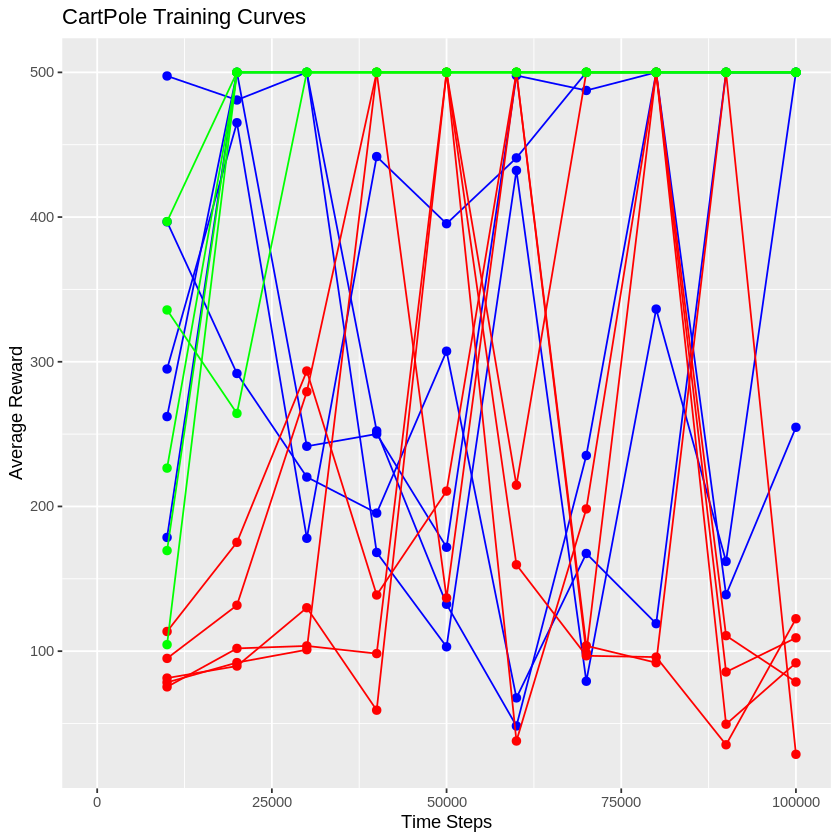

In [34]:
# Load necessary libraries
library(ggplot2)
count = 1

for(i in fileNames)
{
  if(count == 1)
  {
  data <- read.csv(i)
  Cartplot <- ggplot(data, aes(x = timesteps, y = rewards)) +
  geom_point(color = "blue", size = 2) +
  geom_line(color = "blue") +
  #geom_ribbon(aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "blue", alpha = 0.3) +
  labs(x = "Time Steps", y = "Average Reward", title = "CartPole Training Curves") +
  scale_x_continuous(limits = c(0, 100000)) + # Set max value on the x-axis to 100000
  scale_color_manual(values = c("blue", "red","green"), labels = c("a2c", "dqn","ppo")) +
  theme(legend.position = "top")  # Position the legend on top
  }
  else
  {
    if(count<=5)
    {
    data <- read.csv(i)
    Cartplot <- Cartplot +
    geom_line(data = data, aes(x = timesteps, y = rewards), color = "blue") +
    geom_point(data = data,aes(x = timesteps, y = rewards), color = "blue", size = 2)
    #geom_ribbon(data = data, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "blue", alpha = 0.3)
    }

    if(count>=6&&count<=10)
    {
    data <- read.csv(i)
    Cartplot <- Cartplot +
    geom_line(data = data, aes(x = timesteps, y = rewards), color = "red") +
    geom_point(data = data,aes(x = timesteps, y = rewards), color = "red", size = 2)
    #geom_ribbon(data = data, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "red", alpha = 0.3)
    }

    if(count>=11)
    {
    data <- read.csv(i)
    Cartplot <- Cartplot +
    geom_line(data = data, aes(x = timesteps, y = rewards), color = "green") +
    geom_point(data = data,aes(x = timesteps, y = rewards), color = "green", size = 2)
    #geom_ribbon(data = data, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "lightgreen", alpha = 0.3)
    }

  }
  count = count+1
}
print(Cartplot)

Plot the learning curves of each run separately but in a grid

In [35]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



TableGrob (3 x 5) "arrange": 15 grobs
    z     cells    name           grob
1   1 (1-1,1-1) arrange gtable[layout]
2   2 (1-1,2-2) arrange gtable[layout]
3   3 (1-1,3-3) arrange gtable[layout]
4   4 (1-1,4-4) arrange gtable[layout]
5   5 (1-1,5-5) arrange gtable[layout]
6   6 (2-2,1-1) arrange gtable[layout]
7   7 (2-2,2-2) arrange gtable[layout]
8   8 (2-2,3-3) arrange gtable[layout]
9   9 (2-2,4-4) arrange gtable[layout]
10 10 (2-2,5-5) arrange gtable[layout]
11 11 (3-3,1-1) arrange gtable[layout]
12 12 (3-3,2-2) arrange gtable[layout]
13 13 (3-3,3-3) arrange gtable[layout]
14 14 (3-3,4-4) arrange gtable[layout]
15 15 (3-3,5-5) arrange gtable[layout]


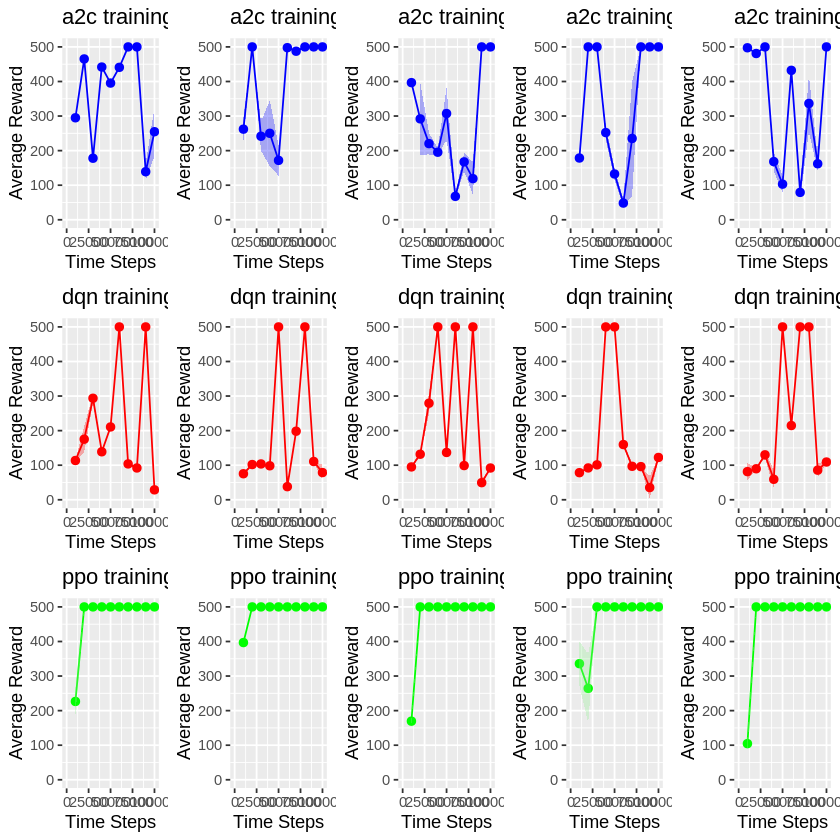

In [36]:
library(gridExtra)
# Initialize a list to store plots
plots <- list()
count = 1
for (i in fileNames)
{
  data <- read.csv(i)

  # Determine color based on count
  if (count <= 5) {
    color <- "blue"
    fill <- "blue"
    title = "a2c training"
  } else if (count <= 10) {
    color <- "red"
    fill <- "red"
    title = "dqn training"
  } else {
    color <- "green"
    fill <- "lightgreen"
    title = "ppo training"
  }

  # Create the plot
  plot <- ggplot(data, aes(x = timesteps, y = rewards)) +
    geom_point(color = color, size = 2) +
    geom_line(color = color) +
    geom_ribbon(aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = fill, alpha = 0.3) +
    labs(x = "Time Steps", y = "Average Reward", title = title) +
    scale_x_continuous(limits = c(0, 100000))+ # Set max value on the x-axis to 100000
    scale_y_continuous(limits=c(0,500))

  # Store the plot in the list
  plots[[count]] <- plot

  # Increment count
  count <- count + 1
}

# Combine plots
Cartplot <- do.call(grid.arrange, c(plots, nrow = 3, ncol = 5))
ggsave("cartpole_training_curves.png", Cartplot, width = 12, height = 8)
# Display the combined plot
print(Cartplot)

Average over runs per algorithm and plot 3 curves only

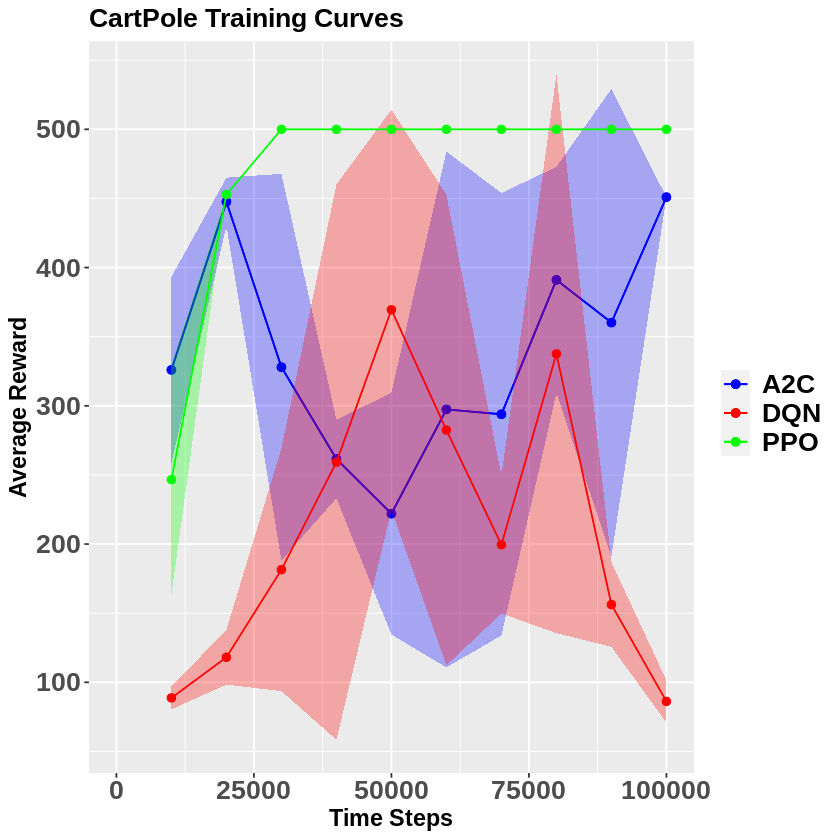

In [37]:
# Load necessary libraries
library(ggplot2)
count = 1
rewardsA2C1 = c()
rewardsA2C2 = c()
rewardsA2C3 = c()
rewardsA2C4 = c()
rewardsA2C5 = c()
rewardsA2C6 = c()
rewardsA2C7 = c()
rewardsA2C8 = c()
rewardsA2C9 = c()
rewardsA2C10 = c()

rewardsDQN1 = c()
rewardsDQN2 = c()
rewardsDQN3 = c()
rewardsDQN4 = c()
rewardsDQN5 = c()
rewardsDQN6 = c()
rewardsDQN7 = c()
rewardsDQN8 = c()
rewardsDQN9 = c()
rewardsDQN10 = c()

rewardsPPO1 = c()
rewardsPPO2 = c()
rewardsPPO3 = c()
rewardsPPO4 = c()
rewardsPPO5 = c()
rewardsPPO6 = c()
rewardsPPO7 = c()
rewardsPPO8 = c()
rewardsPPO9 = c()
rewardsPPO10 = c()

for(i in fileNames)
{
    if(count<=5)
    {
    data <- read.csv(i)
    rewardsA2C1 = c(rewardsA2C1,data$rewards[1])
    rewardsA2C2 = c(rewardsA2C2,data$rewards[2])
    rewardsA2C3 = c(rewardsA2C3,data$rewards[3])
    rewardsA2C4 = c(rewardsA2C4,data$rewards[4])
    rewardsA2C5 = c(rewardsA2C5,data$rewards[5])
    rewardsA2C6 = c(rewardsA2C6,data$rewards[6])
    rewardsA2C7 = c(rewardsA2C7,data$rewards[7])
    rewardsA2C8 = c(rewardsA2C8,data$rewards[8])
    rewardsA2C9 = c(rewardsA2C9,data$rewards[9])
    rewardsA2C10 = c(rewardsA2C10,data$rewards[10])
    }
    if (count==6)
    {
    timesteps = data$timesteps

    rewards = c()
    timestep10 = mean(rewardsA2C1)
    timestep20 = mean(rewardsA2C2)
    timestep30 = mean(rewardsA2C3)
    timestep40 = mean(rewardsA2C4)
    timestep50 = mean(rewardsA2C5)
    timestep60 = mean(rewardsA2C6)
    timestep70 = mean(rewardsA2C7)
    timestep80 = mean(rewardsA2C8)
    timestep90 = mean(rewardsA2C9)
    timestep100 = mean(rewardsA2C10)
    rewards = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)

    uncertainties = c()
    timestep10 = IQR(rewardsA2C1)
    timestep20 = IQR(rewardsA2C2)
    timestep30 = IQR(rewardsA2C3)
    timestep40 = IQR(rewardsA2C4)
    timestep50 = IQR(rewardsA2C5)
    timestep60 = IQR(rewardsA2C6)
    timestep70 = IQR(rewardsA2C7)
    timestep80 = IQR(rewardsA2C8)
    timestep90 = IQR(rewardsA2C9)
    timestep100 = IQR(rewardsA2C10)
    uncertainties = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)
    uncertainties=uncertainties*0.5

    df = data.frame(rewards,timesteps,uncertainties)

    Cartplot <- ggplot(data=df, aes(x = timesteps, y = rewards)) +
    scale_color_manual(values = c("blue", "red", "green"),
                     labels = c("A2C", "DQN", "PPO")) +
    guides(color = guide_legend(title = NULL))+
    geom_point(color = "blue", size = 2) +
    geom_line(color = "blue") +
    labs(x = "Time Steps", y = "Average Reward", title = "CartPole Training Curves") +
    scale_x_continuous(limits = c(0, 100000))  # Set max value on the x-axis to 100000
    Cartplot <- Cartplot +
    geom_line(data = df, aes(x = timesteps, y = rewards, color = "A2C")) +
    geom_point(data = df, aes(x = timesteps, y = rewards, color = "A2C"), size = 2) +
    geom_ribbon(data = df, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "blue", alpha = 0.3)
    }

    if(count>=6&&count<=10)
    {
      data <- read.csv(i)
      rewardsDQN1 = c(rewardsDQN1,data$rewards[1])
      rewardsDQN2 = c(rewardsDQN2,data$rewards[2])
      rewardsDQN3 = c(rewardsDQN3,data$rewards[3])
      rewardsDQN4 = c(rewardsDQN4,data$rewards[4])
      rewardsDQN5 = c(rewardsDQN5,data$rewards[5])
      rewardsDQN6 = c(rewardsDQN6,data$rewards[6])
      rewardsDQN7 = c(rewardsDQN7,data$rewards[7])
      rewardsDQN8 = c(rewardsDQN8,data$rewards[8])
      rewardsDQN9 = c(rewardsDQN9,data$rewards[9])
      rewardsDQN10 = c(rewardsDQN10,data$rewards[10])
    }
    if(count==11)
    {
    timesteps = data$timesteps

    rewards = c()
    timestep10 = mean(rewardsDQN1)
    timestep20 = mean(rewardsDQN2)
    timestep30 = mean(rewardsDQN3)
    timestep40 = mean(rewardsDQN4)
    timestep50 = mean(rewardsDQN5)
    timestep60 = mean(rewardsDQN6)
    timestep70 = mean(rewardsDQN7)
    timestep80 = mean(rewardsDQN8)
    timestep90 = mean(rewardsDQN9)
    timestep100 = mean(rewardsDQN10)
    rewards = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)

    uncertainties = c()
    timestep10 = IQR(rewardsDQN1)
    timestep20 = IQR(rewardsDQN2)
    timestep30 = IQR(rewardsDQN3)
    timestep40 = IQR(rewardsDQN4)
    timestep50 = IQR(rewardsDQN5)
    timestep60 = IQR(rewardsDQN6)
    timestep70 = IQR(rewardsDQN7)
    timestep80 = IQR(rewardsDQN8)
    timestep90 = IQR(rewardsDQN9)
    timestep100 = IQR(rewardsDQN10)
    uncertainties = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)
    uncertainties=uncertainties*0.5

    df = data.frame(rewards,timesteps,uncertainties)

    Cartplot <- Cartplot +
    geom_line(data = df, aes(x = timesteps, y = rewards, color = "DQN")) +
    geom_point(data = df,aes(x = timesteps, y = rewards, color = "DQN"), size = 2) +
    geom_ribbon(data = df, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "red", alpha = 0.3)
    }

    if(count>=11)
    {
      data <- read.csv(i)
rewardsPPO1 = c(rewardsPPO1,data$rewards[1])
rewardsPPO2 = c(rewardsPPO2,data$rewards[2])
rewardsPPO3 = c(rewardsPPO3,data$rewards[3])
rewardsPPO4 = c(rewardsPPO4,data$rewards[4])
rewardsPPO5 = c(rewardsPPO5,data$rewards[5])
rewardsPPO6 = c(rewardsPPO6,data$rewards[6])
rewardsPPO7 = c(rewardsPPO7,data$rewards[7])
rewardsPPO8 = c(rewardsPPO8,data$rewards[8])
rewardsPPO9 = c(rewardsPPO9,data$rewards[9])
rewardsPPO10 = c(rewardsPPO10,data$rewards[10])

    }

    if(count==15)
    {

    rewards = c()
    timestep10 = mean(rewardsPPO1)
    timestep20 = mean(rewardsPPO2)
    timestep30 = mean(rewardsPPO3)
    timestep40 = mean(rewardsPPO4)
    timestep50 = mean(rewardsPPO5)
    timestep60 = mean(rewardsPPO6)
    timestep70 = mean(rewardsPPO7)
    timestep80 = mean(rewardsPPO8)
    timestep90 = mean(rewardsPPO9)
    timestep100 = mean(rewardsPPO10)
    rewards = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)

    uncertainties = c()
    timestep10 = IQR(rewardsPPO1)
    timestep20 = IQR(rewardsPPO2)
    timestep30 = IQR(rewardsPPO3)
    timestep40 = IQR(rewardsPPO4)
    timestep50 = IQR(rewardsPPO5)
    timestep60 = IQR(rewardsPPO6)
    timestep70 = IQR(rewardsPPO7)
    timestep80 = IQR(rewardsPPO8)
    timestep90 = IQR(rewardsPPO9)
    timestep100 = IQR(rewardsPPO10)
    uncertainties = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)
    uncertainties=uncertainties*0.5

    df = data.frame(rewards,timesteps,uncertainties)

    Cartplot <- Cartplot +
    geom_line(data = df, aes(x = timesteps, y = rewards, color = "PPO")) +
    geom_point(data = df,aes(x = timesteps, y = rewards, color = "PPO"), size = 2) +
    geom_ribbon(data = df, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "green", alpha = 0.3)
    }
  count = count+1
}
Cartplot = Cartplot +
  theme(axis.text = element_text(size = 16, face = "bold"),  # Adjust axis text size and make it bold
        axis.title = element_text(size = 14, face = "bold"),  # Adjust axis title size and make it bold
        legend.title = element_text(size = 14, face = "bold"),  # Adjust legend title size and make it bold
        legend.text = element_text(size = 16, face = "bold"),  # Adjust legend text size and make it bold
        plot.title = element_text(size = 16, face = "bold"))
ggsave("cartSampleEfficiency.png", Cartplot, width = 7.5, height = 5.5)
print(Cartplot)

#### Acrobot

In [38]:
env = "acro"
algs = c("a2c","dqn","ppo")
fileNames = c()

for(j in algs)
for(runs in 1:5)
{
{
  fileNames = c(fileNames,paste(env,"_",j,runs,".txt.csv",sep=""))
}
}

Superimpose the learning curves of each run

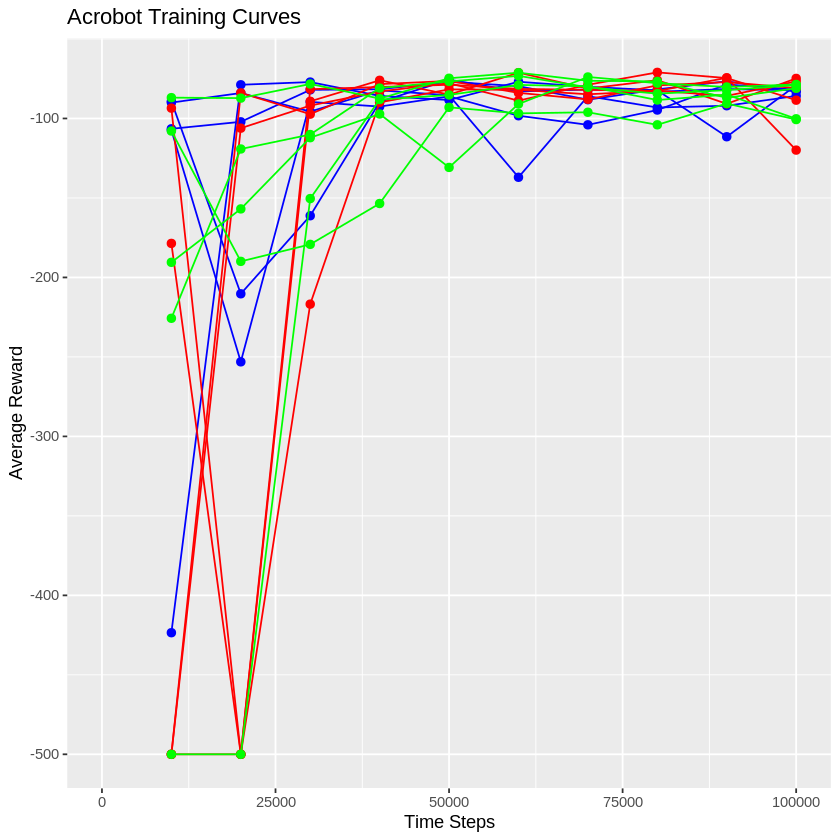

In [39]:
# Load necessary libraries
library(ggplot2)
count = 1

for(i in fileNames)
{
  if(count == 1)
  {
  data <- read.csv(i)
  Cartplot <- ggplot(data, aes(x = timesteps, y = rewards)) +
  geom_point(color = "blue", size = 2) +
  geom_line(color = "blue") +
  #geom_ribbon(aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "blue", alpha = 0.3) +
  labs(x = "Time Steps", y = "Average Reward", title = "Acrobot Training Curves") +
  scale_x_continuous(limits = c(0, 100000)) + # Set max value on the x-axis to 100000
  scale_color_manual(values = c("blue", "red","green"), labels = c("a2c", "dqn","ppo")) +
  theme(legend.position = "top")  # Position the legend on top
  }
  else
  {
    if(count<=5)
    {
    data <- read.csv(i)
    Cartplot <- Cartplot +
    geom_line(data = data, aes(x = timesteps, y = rewards), color = "blue") +
    geom_point(data = data,aes(x = timesteps, y = rewards), color = "blue", size = 2)
    #geom_ribbon(data = data, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "blue", alpha = 0.3)
    }

    if(count>=6&&count<=10)
    {
    data <- read.csv(i)
    Cartplot <- Cartplot +
    geom_line(data = data, aes(x = timesteps, y = rewards), color = "red") +
    geom_point(data = data,aes(x = timesteps, y = rewards), color = "red", size = 2)
    #geom_ribbon(data = data, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "red", alpha = 0.3)
    }

    if(count>=11)
    {
    data <- read.csv(i)
    Cartplot <- Cartplot +
    geom_line(data = data, aes(x = timesteps, y = rewards), color = "green") +
    geom_point(data = data,aes(x = timesteps, y = rewards), color = "green", size = 2)
    #geom_ribbon(data = data, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "lightgreen", alpha = 0.3)
    }

  }
  count = count+1
}
print(Cartplot)

Plot the learning curves of each run separately but in a grid

In [40]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



TableGrob (3 x 5) "arrange": 15 grobs
    z     cells    name           grob
1   1 (1-1,1-1) arrange gtable[layout]
2   2 (1-1,2-2) arrange gtable[layout]
3   3 (1-1,3-3) arrange gtable[layout]
4   4 (1-1,4-4) arrange gtable[layout]
5   5 (1-1,5-5) arrange gtable[layout]
6   6 (2-2,1-1) arrange gtable[layout]
7   7 (2-2,2-2) arrange gtable[layout]
8   8 (2-2,3-3) arrange gtable[layout]
9   9 (2-2,4-4) arrange gtable[layout]
10 10 (2-2,5-5) arrange gtable[layout]
11 11 (3-3,1-1) arrange gtable[layout]
12 12 (3-3,2-2) arrange gtable[layout]
13 13 (3-3,3-3) arrange gtable[layout]
14 14 (3-3,4-4) arrange gtable[layout]
15 15 (3-3,5-5) arrange gtable[layout]


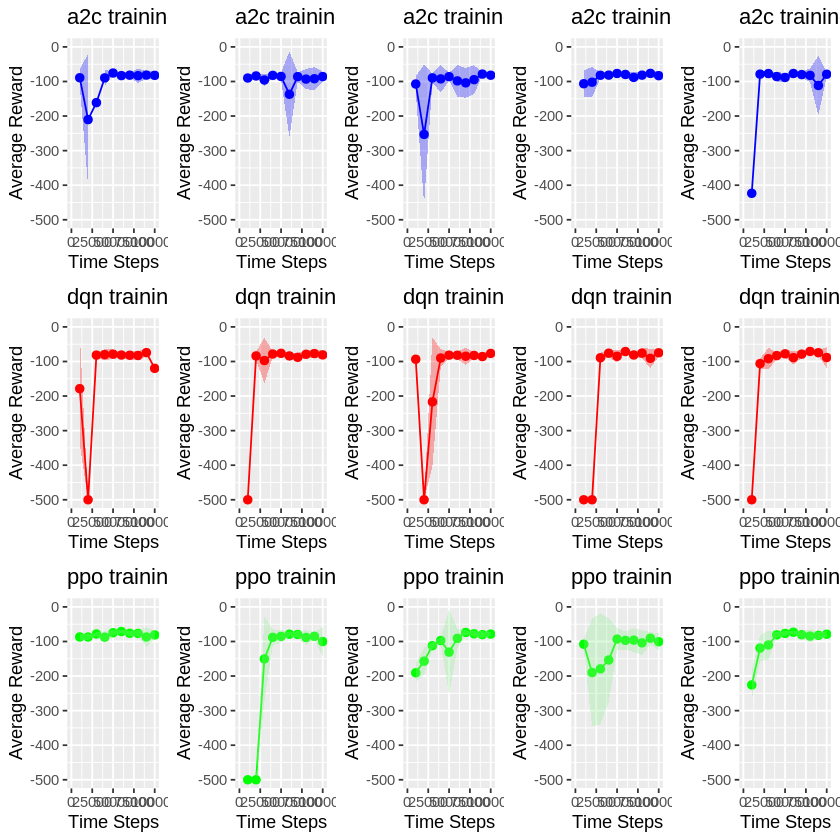

In [41]:
library(gridExtra)
# Initialize a list to store plots
plots <- list()
count = 1
for (i in fileNames)
{
  data <- read.csv(i)

  # Determine color based on count
  if (count <= 5) {
    color <- "blue"
    fill <- "blue"
    title = "a2c training"
  } else if (count <= 10) {
    color <- "red"
    fill <- "red"
    title = "dqn training"
  } else {
    color <- "green"
    fill <- "lightgreen"
    title = "ppo training"
  }

  # Create the plot
  plot <- ggplot(data, aes(x = timesteps, y = rewards)) +
    geom_point(color = color, size = 2) +
    geom_line(color = color) +
    geom_ribbon(aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = fill, alpha = 0.3) +
    labs(x = "Time Steps", y = "Average Reward", title = title) +
    scale_x_continuous(limits = c(0, 100000))+ # Set max value on the x-axis to 100000
    scale_y_continuous(limits = c(-500,0))

  # Store the plot in the list
  plots[[count]] <- plot

  # Increment count
  count <- count + 1
}

# Combine plots
Cartplot <- do.call(grid.arrange, c(plots, nrow = 3, ncol = 5))
ggsave("acrobot_training_curves.png", Cartplot, width = 12, height = 8)
# Display the combined plot
print(Cartplot)

Average over runs per algorithm and plot 3 curves only

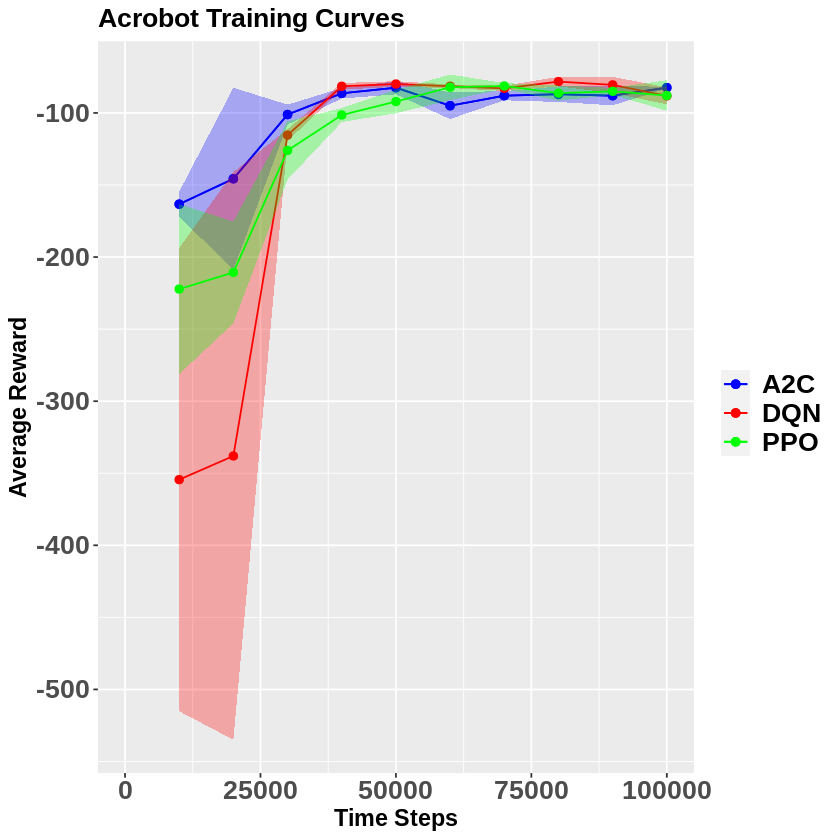

In [42]:
# Load necessary libraries
library(ggplot2)
count = 1
rewardsA2C1 = c()
rewardsA2C2 = c()
rewardsA2C3 = c()
rewardsA2C4 = c()
rewardsA2C5 = c()
rewardsA2C6 = c()
rewardsA2C7 = c()
rewardsA2C8 = c()
rewardsA2C9 = c()
rewardsA2C10 = c()

rewardsDQN1 = c()
rewardsDQN2 = c()
rewardsDQN3 = c()
rewardsDQN4 = c()
rewardsDQN5 = c()
rewardsDQN6 = c()
rewardsDQN7 = c()
rewardsDQN8 = c()
rewardsDQN9 = c()
rewardsDQN10 = c()

rewardsPPO1 = c()
rewardsPPO2 = c()
rewardsPPO3 = c()
rewardsPPO4 = c()
rewardsPPO5 = c()
rewardsPPO6 = c()
rewardsPPO7 = c()
rewardsPPO8 = c()
rewardsPPO9 = c()
rewardsPPO10 = c()

for(i in fileNames)
{
    if(count<=5)
    {
    data <- read.csv(i)
    rewardsA2C1 = c(rewardsA2C1,data$rewards[1])
    rewardsA2C2 = c(rewardsA2C2,data$rewards[2])
    rewardsA2C3 = c(rewardsA2C3,data$rewards[3])
    rewardsA2C4 = c(rewardsA2C4,data$rewards[4])
    rewardsA2C5 = c(rewardsA2C5,data$rewards[5])
    rewardsA2C6 = c(rewardsA2C6,data$rewards[6])
    rewardsA2C7 = c(rewardsA2C7,data$rewards[7])
    rewardsA2C8 = c(rewardsA2C8,data$rewards[8])
    rewardsA2C9 = c(rewardsA2C9,data$rewards[9])
    rewardsA2C10 = c(rewardsA2C10,data$rewards[10])
    }
    if (count==6)
    {
    timesteps = data$timesteps

    rewards = c()
    timestep10 = mean(rewardsA2C1)
    timestep20 = mean(rewardsA2C2)
    timestep30 = mean(rewardsA2C3)
    timestep40 = mean(rewardsA2C4)
    timestep50 = mean(rewardsA2C5)
    timestep60 = mean(rewardsA2C6)
    timestep70 = mean(rewardsA2C7)
    timestep80 = mean(rewardsA2C8)
    timestep90 = mean(rewardsA2C9)
    timestep100 = mean(rewardsA2C10)
    rewards = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)

    uncertainties = c()
    timestep10 = IQR(rewardsA2C1)
    timestep20 = IQR(rewardsA2C2)
    timestep30 = IQR(rewardsA2C3)
    timestep40 = IQR(rewardsA2C4)
    timestep50 = IQR(rewardsA2C5)
    timestep60 = IQR(rewardsA2C6)
    timestep70 = IQR(rewardsA2C7)
    timestep80 = IQR(rewardsA2C8)
    timestep90 = IQR(rewardsA2C9)
    timestep100 = IQR(rewardsA2C10)
    uncertainties = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)
    uncertainties=uncertainties*0.5

    df = data.frame(rewards,timesteps,uncertainties)

    Cartplot <- ggplot(data=df, aes(x = timesteps, y = rewards)) +
    scale_color_manual(values = c("blue", "red", "green"),
                     labels = c("A2C", "DQN", "PPO")) +
    guides(color = guide_legend(title = NULL))+
    geom_point(color = "blue", size = 2) +
    geom_line(color = "blue") +
    labs(x = "Time Steps", y = "Average Reward", title = "Acrobot Training Curves") +
    scale_x_continuous(limits = c(0, 100000))
    Cartplot <- Cartplot +
    geom_line(data = df, aes(x = timesteps, y = rewards, color = "A2C")) +
    geom_point(data = df, aes(x = timesteps, y = rewards, color = "A2C"), size = 2) +
    geom_ribbon(data = df, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "blue", alpha = 0.3)
    }

    if(count>=6&&count<=10)
    {
      data <- read.csv(i)
      rewardsDQN1 = c(rewardsDQN1,data$rewards[1])
      rewardsDQN2 = c(rewardsDQN2,data$rewards[2])
      rewardsDQN3 = c(rewardsDQN3,data$rewards[3])
      rewardsDQN4 = c(rewardsDQN4,data$rewards[4])
      rewardsDQN5 = c(rewardsDQN5,data$rewards[5])
      rewardsDQN6 = c(rewardsDQN6,data$rewards[6])
      rewardsDQN7 = c(rewardsDQN7,data$rewards[7])
      rewardsDQN8 = c(rewardsDQN8,data$rewards[8])
      rewardsDQN9 = c(rewardsDQN9,data$rewards[9])
      rewardsDQN10 = c(rewardsDQN10,data$rewards[10])
    }
    if(count==11)
    {
    timesteps = data$timesteps

    rewards = c()
    timestep10 = mean(rewardsDQN1)
    timestep20 = mean(rewardsDQN2)
    timestep30 = mean(rewardsDQN3)
    timestep40 = mean(rewardsDQN4)
    timestep50 = mean(rewardsDQN5)
    timestep60 = mean(rewardsDQN6)
    timestep70 = mean(rewardsDQN7)
    timestep80 = mean(rewardsDQN8)
    timestep90 = mean(rewardsDQN9)
    timestep100 = mean(rewardsDQN10)
    rewards = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)

    uncertainties = c()
    timestep10 = IQR(rewardsDQN1)
    timestep20 = IQR(rewardsDQN2)
    timestep30 = IQR(rewardsDQN3)
    timestep40 = IQR(rewardsDQN4)
    timestep50 = IQR(rewardsDQN5)
    timestep60 = IQR(rewardsDQN6)
    timestep70 = IQR(rewardsDQN7)
    timestep80 = IQR(rewardsDQN8)
    timestep90 = IQR(rewardsDQN9)
    timestep100 = IQR(rewardsDQN10)
    uncertainties = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)
    uncertainties=uncertainties*0.5

    df = data.frame(rewards,timesteps,uncertainties)

    Cartplot <- Cartplot +
    geom_line(data = df, aes(x = timesteps, y = rewards, color = "DQN")) +
    geom_point(data = df,aes(x = timesteps, y = rewards, color = "DQN"), size = 2) +
    geom_ribbon(data = df, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "red", alpha = 0.3)
    }

    if(count>=11)
    {
      data <- read.csv(i)
rewardsPPO1 = c(rewardsPPO1,data$rewards[1])
rewardsPPO2 = c(rewardsPPO2,data$rewards[2])
rewardsPPO3 = c(rewardsPPO3,data$rewards[3])
rewardsPPO4 = c(rewardsPPO4,data$rewards[4])
rewardsPPO5 = c(rewardsPPO5,data$rewards[5])
rewardsPPO6 = c(rewardsPPO6,data$rewards[6])
rewardsPPO7 = c(rewardsPPO7,data$rewards[7])
rewardsPPO8 = c(rewardsPPO8,data$rewards[8])
rewardsPPO9 = c(rewardsPPO9,data$rewards[9])
rewardsPPO10 = c(rewardsPPO10,data$rewards[10])

    }

    if(count==15)
    {

    rewards = c()
    timestep10 = mean(rewardsPPO1)
    timestep20 = mean(rewardsPPO2)
    timestep30 = mean(rewardsPPO3)
    timestep40 = mean(rewardsPPO4)
    timestep50 = mean(rewardsPPO5)
    timestep60 = mean(rewardsPPO6)
    timestep70 = mean(rewardsPPO7)
    timestep80 = mean(rewardsPPO8)
    timestep90 = mean(rewardsPPO9)
    timestep100 = mean(rewardsPPO10)
    rewards = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)

    uncertainties = c()
    timestep10 = IQR(rewardsPPO1)
    timestep20 = IQR(rewardsPPO2)
    timestep30 = IQR(rewardsPPO3)
    timestep40 = IQR(rewardsPPO4)
    timestep50 = IQR(rewardsPPO5)
    timestep60 = IQR(rewardsPPO6)
    timestep70 = IQR(rewardsPPO7)
    timestep80 = IQR(rewardsPPO8)
    timestep90 = IQR(rewardsPPO9)
    timestep100 = IQR(rewardsPPO10)
    uncertainties = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)
    uncertainties=uncertainties*0.5

    df = data.frame(rewards,timesteps,uncertainties)

    Cartplot <- Cartplot +
    geom_line(data = df, aes(x = timesteps, y = rewards, color = "PPO")) +
    geom_point(data = df,aes(x = timesteps, y = rewards, color = "PPO"), size = 2) +
    geom_ribbon(data = df, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "green", alpha = 0.3)
    }
  count = count+1
}
Cartplot = Cartplot +
  theme(axis.text = element_text(size = 16, face = "bold"),  # Adjust axis text size and make it bold
        axis.title = element_text(size = 14, face = "bold"),  # Adjust axis title size and make it bold
        legend.title = element_text(size = 14, face = "bold"),  # Adjust legend title size and make it bold
        legend.text = element_text(size = 16, face = "bold"),  # Adjust legend text size and make it bold
        plot.title = element_text(size = 16, face = "bold"))
ggsave("acrobatSAmpleEfficiency.png", Cartplot, width = 7.5, height = 5.5)
print(Cartplot)

#### Lunar Lander

In [43]:
env = "ll"
algs = c("a2c","dqn","ppo")
fileNames = c()

for(j in algs)
for(runs in 1:5)
{
{
  fileNames = c(fileNames,paste(env,"_",j,runs,".txt.csv",sep=""))
}
}

Superimpose the learning curves of each run

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


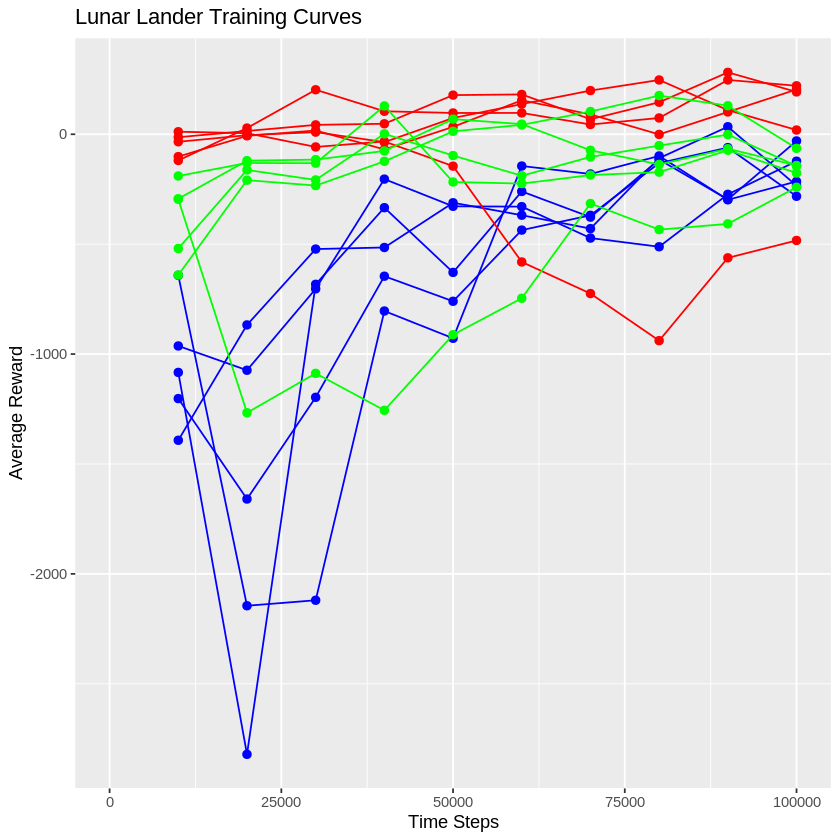

In [44]:
# Load necessary libraries
library(ggplot2)
count = 1

for(i in fileNames)
{
  if(count == 1)
  {
  data <- read.csv(i)
  Cartplot <- ggplot(data, aes(x = timesteps, y = rewards)) +
  geom_point(color = "blue", size = 2) +
  geom_line(color = "blue") +
  #geom_ribbon(aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "blue", alpha = 0.3) +
  labs(x = "Time Steps", y = "Average Reward", title = "Lunar Lander Training Curves") +
  scale_x_continuous(limits = c(0, 100000)) + # Set max value on the x-axis to 100000
  scale_color_manual(values = c("blue", "red","green"), labels = c("a2c", "dqn","ppo")) +
  theme(legend.position = "top")  # Position the legend on top
  }
  else
  {
    if(count<=5)
    {
    data <- read.csv(i)
    Cartplot <- Cartplot +
    geom_line(data = data, aes(x = timesteps, y = rewards), color = "blue") +
    geom_point(data = data,aes(x = timesteps, y = rewards), color = "blue", size = 2)
    #geom_ribbon(data = data, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "blue", alpha = 0.3)
    }

    if(count>=6&&count<=10)
    {
    data <- read.csv(i)
    Cartplot <- Cartplot +
    geom_line(data = data, aes(x = timesteps, y = rewards), color = "red") +
    geom_point(data = data,aes(x = timesteps, y = rewards), color = "red", size = 2)
    #geom_ribbon(data = data, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "red", alpha = 0.3)
    }

    if(count>=11)
    {
    data <- read.csv(i)
    Cartplot <- Cartplot +
    geom_line(data = data, aes(x = timesteps, y = rewards), color = "green") +
    geom_point(data = data,aes(x = timesteps, y = rewards), color = "green", size = 2)
    #geom_ribbon(data = data, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "lightgreen", alpha = 0.3)
    }

  }
  count = count+1
}
print(Cartplot)

Plot the learning curves of each run separately but in a grid

In [45]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_poin

TableGrob (3 x 5) "arrange": 15 grobs
    z     cells    name           grob
1   1 (1-1,1-1) arrange gtable[layout]
2   2 (1-1,2-2) arrange gtable[layout]
3   3 (1-1,3-3) arrange gtable[layout]
4   4 (1-1,4-4) arrange gtable[layout]
5   5 (1-1,5-5) arrange gtable[layout]
6   6 (2-2,1-1) arrange gtable[layout]
7   7 (2-2,2-2) arrange gtable[layout]
8   8 (2-2,3-3) arrange gtable[layout]
9   9 (2-2,4-4) arrange gtable[layout]
10 10 (2-2,5-5) arrange gtable[layout]
11 11 (3-3,1-1) arrange gtable[layout]
12 12 (3-3,2-2) arrange gtable[layout]
13 13 (3-3,3-3) arrange gtable[layout]
14 14 (3-3,4-4) arrange gtable[layout]
15 15 (3-3,5-5) arrange gtable[layout]


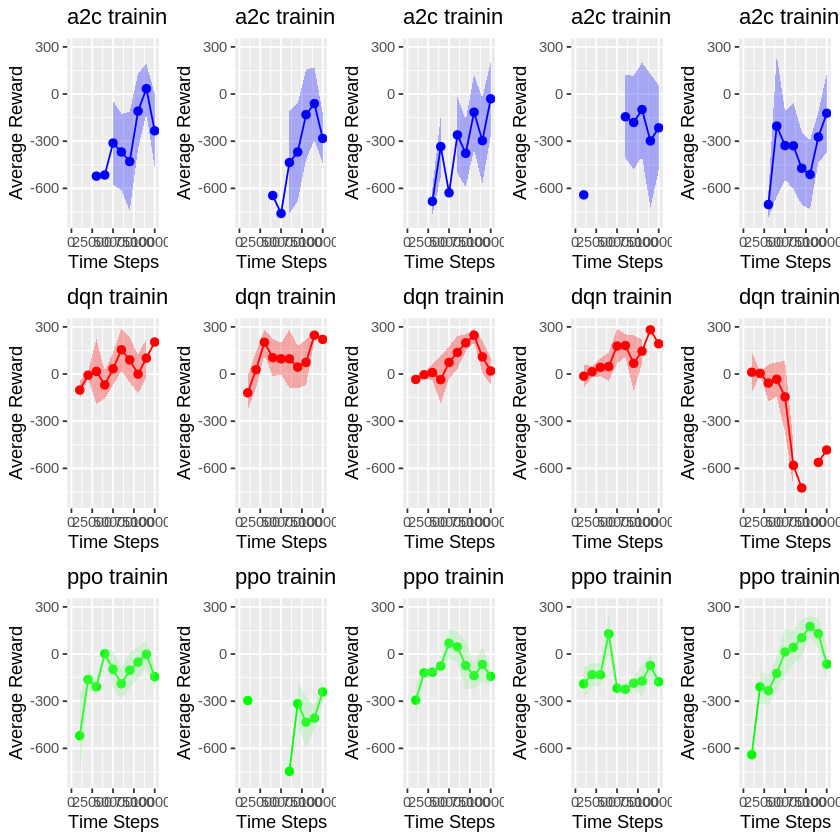

In [46]:
library(gridExtra)
# Initialize a list to store plots
plots <- list()
count = 1
for (i in fileNames)
{
  data <- read.csv(i)

  # Determine color based on count
  if (count <= 5) {
    color <- "blue"
    fill <- "blue"
    title = "a2c training"
  } else if (count <= 10) {
    color <- "red"
    fill <- "red"
    title = "dqn training"
  } else {
    color <- "green"
    fill <- "lightgreen"
    title = "ppo training"
  }

  # Create the plot
  plot <- ggplot(data, aes(x = timesteps, y = rewards)) +
    geom_point(color = color, size = 2) +
    geom_line(color = color) +
    geom_ribbon(aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = fill, alpha = 0.3) +
    labs(x = "Time Steps", y = "Average Reward", title = title) +
    scale_x_continuous(limits = c(0, 100000)) +# Set max value on the x-axis to 100000
  scale_y_continuous(limits=c(-800,300))

  # Store the plot in the list
  plots[[count]] <- plot

  # Increment count
  count <- count + 1
}

# Combine plots
Cartplot <- do.call(grid.arrange, c(plots, nrow = 3, ncol = 5))
ggsave("lunarLander_training_curves.png", Cartplot, width = 12, height = 8)
# Display the combined plot
print(Cartplot)

Average over runs per algorithm and plot 3 curves only

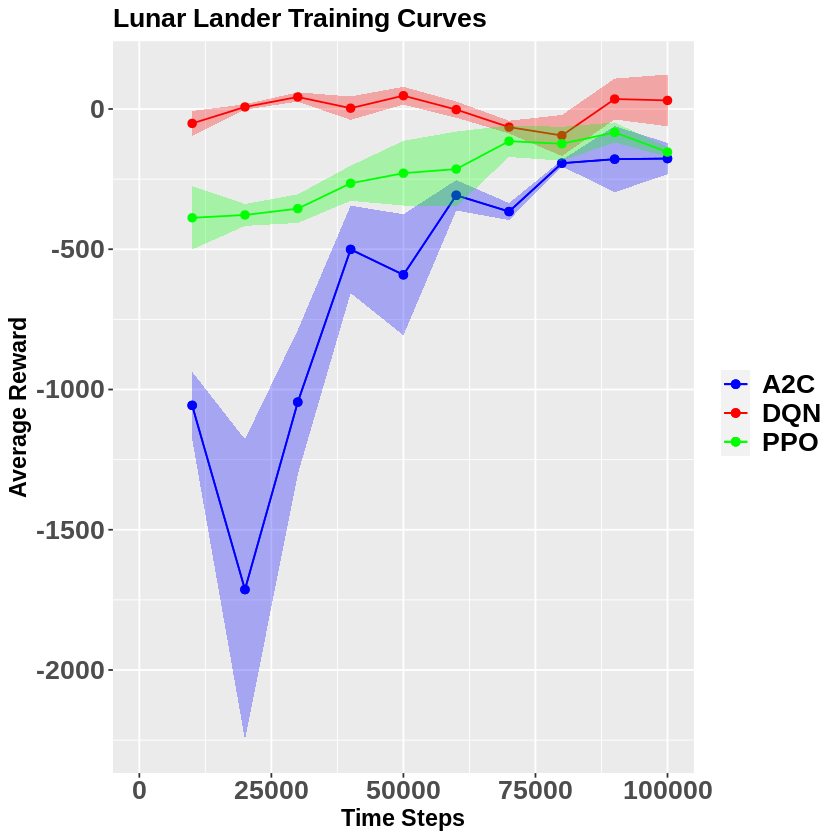

In [47]:
# Load necessary libraries
library(ggplot2)
count = 1
rewardsA2C1 = c()
rewardsA2C2 = c()
rewardsA2C3 = c()
rewardsA2C4 = c()
rewardsA2C5 = c()
rewardsA2C6 = c()
rewardsA2C7 = c()
rewardsA2C8 = c()
rewardsA2C9 = c()
rewardsA2C10 = c()

rewardsDQN1 = c()
rewardsDQN2 = c()
rewardsDQN3 = c()
rewardsDQN4 = c()
rewardsDQN5 = c()
rewardsDQN6 = c()
rewardsDQN7 = c()
rewardsDQN8 = c()
rewardsDQN9 = c()
rewardsDQN10 = c()

rewardsPPO1 = c()
rewardsPPO2 = c()
rewardsPPO3 = c()
rewardsPPO4 = c()
rewardsPPO5 = c()
rewardsPPO6 = c()
rewardsPPO7 = c()
rewardsPPO8 = c()
rewardsPPO9 = c()
rewardsPPO10 = c()

for(i in fileNames)
{
    if(count<=5)
    {
    data <- read.csv(i)
    rewardsA2C1 = c(rewardsA2C1,data$rewards[1])
    rewardsA2C2 = c(rewardsA2C2,data$rewards[2])
    rewardsA2C3 = c(rewardsA2C3,data$rewards[3])
    rewardsA2C4 = c(rewardsA2C4,data$rewards[4])
    rewardsA2C5 = c(rewardsA2C5,data$rewards[5])
    rewardsA2C6 = c(rewardsA2C6,data$rewards[6])
    rewardsA2C7 = c(rewardsA2C7,data$rewards[7])
    rewardsA2C8 = c(rewardsA2C8,data$rewards[8])
    rewardsA2C9 = c(rewardsA2C9,data$rewards[9])
    rewardsA2C10 = c(rewardsA2C10,data$rewards[10])
    }
    if (count==6)
    {
    timesteps = data$timesteps

    rewards = c()
    timestep10 = mean(rewardsA2C1)
    timestep20 = mean(rewardsA2C2)
    timestep30 = mean(rewardsA2C3)
    timestep40 = mean(rewardsA2C4)
    timestep50 = mean(rewardsA2C5)
    timestep60 = mean(rewardsA2C6)
    timestep70 = mean(rewardsA2C7)
    timestep80 = mean(rewardsA2C8)
    timestep90 = mean(rewardsA2C9)
    timestep100 = mean(rewardsA2C10)
    rewards = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)

    uncertainties = c()
    timestep10 = IQR(rewardsA2C1)
    timestep20 = IQR(rewardsA2C2)
    timestep30 = IQR(rewardsA2C3)
    timestep40 = IQR(rewardsA2C4)
    timestep50 = IQR(rewardsA2C5)
    timestep60 = IQR(rewardsA2C6)
    timestep70 = IQR(rewardsA2C7)
    timestep80 = IQR(rewardsA2C8)
    timestep90 = IQR(rewardsA2C9)
    timestep100 = IQR(rewardsA2C10)
    uncertainties = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)
    uncertainties=uncertainties*0.5

    df = data.frame(rewards,timesteps,uncertainties)

    Cartplot <- ggplot(data=df, aes(x = timesteps, y = rewards)) +
    scale_color_manual(values = c("blue", "red", "green"),
                     labels = c("A2C", "DQN", "PPO")) +
    guides(color = guide_legend(title = NULL))+
    geom_point(color = "blue", size = 2) +
    geom_line(color = "blue") +
    labs(x = "Time Steps", y = "Average Reward", title = "Lunar Lander Training Curves") +
    scale_x_continuous(limits = c(0, 100000))  # Set max value on the x-axis to 100000
    Cartplot <- Cartplot +
    geom_line(data = df, aes(x = timesteps, y = rewards, color = "A2C")) +
    geom_point(data = df, aes(x = timesteps, y = rewards, color = "A2C"), size = 2) +
    geom_ribbon(data = df, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "blue", alpha = 0.3)
    }

    if(count>=6&&count<=10)
    {
      data <- read.csv(i)
      rewardsDQN1 = c(rewardsDQN1,data$rewards[1])
      rewardsDQN2 = c(rewardsDQN2,data$rewards[2])
      rewardsDQN3 = c(rewardsDQN3,data$rewards[3])
      rewardsDQN4 = c(rewardsDQN4,data$rewards[4])
      rewardsDQN5 = c(rewardsDQN5,data$rewards[5])
      rewardsDQN6 = c(rewardsDQN6,data$rewards[6])
      rewardsDQN7 = c(rewardsDQN7,data$rewards[7])
      rewardsDQN8 = c(rewardsDQN8,data$rewards[8])
      rewardsDQN9 = c(rewardsDQN9,data$rewards[9])
      rewardsDQN10 = c(rewardsDQN10,data$rewards[10])
    }
    if(count==11)
    {
    timesteps = data$timesteps

    rewards = c()
    timestep10 = mean(rewardsDQN1)
    timestep20 = mean(rewardsDQN2)
    timestep30 = mean(rewardsDQN3)
    timestep40 = mean(rewardsDQN4)
    timestep50 = mean(rewardsDQN5)
    timestep60 = mean(rewardsDQN6)
    timestep70 = mean(rewardsDQN7)
    timestep80 = mean(rewardsDQN8)
    timestep90 = mean(rewardsDQN9)
    timestep100 = mean(rewardsDQN10)
    rewards = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)

    uncertainties = c()
    timestep10 = IQR(rewardsDQN1)
    timestep20 = IQR(rewardsDQN2)
    timestep30 = IQR(rewardsDQN3)
    timestep40 = IQR(rewardsDQN4)
    timestep50 = IQR(rewardsDQN5)
    timestep60 = IQR(rewardsDQN6)
    timestep70 = IQR(rewardsDQN7)
    timestep80 = IQR(rewardsDQN8)
    timestep90 = IQR(rewardsDQN9)
    timestep100 = IQR(rewardsDQN10)
    uncertainties = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)
    uncertainties=uncertainties*0.5

    df = data.frame(rewards,timesteps,uncertainties)

    Cartplot <- Cartplot +
    geom_line(data = df, aes(x = timesteps, y = rewards, color = "DQN")) +
    geom_point(data = df,aes(x = timesteps, y = rewards, color = "DQN"), size = 2) +
    geom_ribbon(data = df, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "red", alpha = 0.3)
    }

    if(count>=11)
    {
      data <- read.csv(i)
rewardsPPO1 = c(rewardsPPO1,data$rewards[1])
rewardsPPO2 = c(rewardsPPO2,data$rewards[2])
rewardsPPO3 = c(rewardsPPO3,data$rewards[3])
rewardsPPO4 = c(rewardsPPO4,data$rewards[4])
rewardsPPO5 = c(rewardsPPO5,data$rewards[5])
rewardsPPO6 = c(rewardsPPO6,data$rewards[6])
rewardsPPO7 = c(rewardsPPO7,data$rewards[7])
rewardsPPO8 = c(rewardsPPO8,data$rewards[8])
rewardsPPO9 = c(rewardsPPO9,data$rewards[9])
rewardsPPO10 = c(rewardsPPO10,data$rewards[10])

    }

    if(count==15)
    {

    rewards = c()
    timestep10 = mean(rewardsPPO1)
    timestep20 = mean(rewardsPPO2)
    timestep30 = mean(rewardsPPO3)
    timestep40 = mean(rewardsPPO4)
    timestep50 = mean(rewardsPPO5)
    timestep60 = mean(rewardsPPO6)
    timestep70 = mean(rewardsPPO7)
    timestep80 = mean(rewardsPPO8)
    timestep90 = mean(rewardsPPO9)
    timestep100 = mean(rewardsPPO10)
    rewards = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)

    uncertainties = c()
    timestep10 = IQR(rewardsPPO1)
    timestep20 = IQR(rewardsPPO2)
    timestep30 = IQR(rewardsPPO3)
    timestep40 = IQR(rewardsPPO4)
    timestep50 = IQR(rewardsPPO5)
    timestep60 = IQR(rewardsPPO6)
    timestep70 = IQR(rewardsPPO7)
    timestep80 = IQR(rewardsPPO8)
    timestep90 = IQR(rewardsPPO9)
    timestep100 = IQR(rewardsPPO10)
    uncertainties = c(timestep10,timestep20,timestep30,timestep40,timestep50,timestep60,timestep70,timestep80,timestep90,timestep100)
    uncertainties=uncertainties*0.5

    df = data.frame(rewards,timesteps,uncertainties)

    Cartplot <- Cartplot +
    geom_line(data = df, aes(x = timesteps, y = rewards, color = "PPO")) +
    geom_point(data = df,aes(x = timesteps, y = rewards, color = "PPO"), size = 2) +
    geom_ribbon(data = df, aes(ymin = rewards - uncertainties, ymax = rewards + uncertainties), fill = "green", alpha = 0.3)
    }
  count = count+1
}
Cartplot = Cartplot +
  theme(axis.text = element_text(size = 16, face = "bold"),  # Adjust axis text size and make it bold
        axis.title = element_text(size = 14, face = "bold"),  # Adjust axis title size and make it bold
        legend.title = element_text(size = 14, face = "bold"),  # Adjust legend title size and make it bold
        legend.text = element_text(size = 16, face = "bold"),  # Adjust legend text size and make it bold
        plot.title = element_text(size = 16, face = "bold"))
ggsave("lunarlanderSampleEfficiency.png", Cartplot, width = 7.5, height = 5.5)
print(Cartplot)